In [83]:
import pandas as pd
import cdt
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [84]:
# read data
df = pd.read_csv('../../data/session-df-ak.csv')
#df = pd.read_csv('../../data/training_set/log_mini.csv')
#df = pickle.load( open( "../../data/df_causal_discovery.p", "rb") )

In [62]:
# add skip column
def f(s1, s2, s3):
    if s1:
        return 1
    elif s2:
        return 2
    elif s3:
        return 3
    return 0
    
df['skip'] = df.apply(lambda x: f(x.skip_1, x.skip_2, x.skip_3), axis=1)
print(df['skip'].value_counts())
df['skip'].describe()

1    70762
0    59029
3    22027
2    16062
Name: skip, dtype: int64


count    167880.000000
mean          1.006475
std           0.985942
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: skip, dtype: float64

In [85]:
df.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'skip', 'custom_skip'],
      dtype='object')

In [86]:
cols1 = ['custom_skip', 'hour_of_day', 'session_position', 'premium', 'session_length', 'no_pause_before_play']
df1 = df[cols1]
for col in cols1:
    df1[col] = df1[col].astype(int)

cols2 = ['custom_skip', 'hour_of_day', 'session_position', 'premium', 'no_pause_before_play']
df2 = df[cols2]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


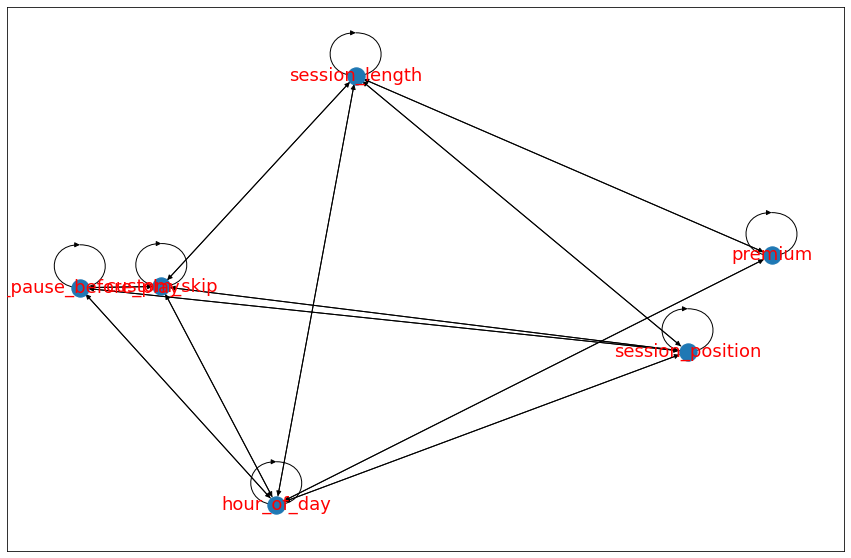

In [87]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to data
skeleton = glasso.predict(df1)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

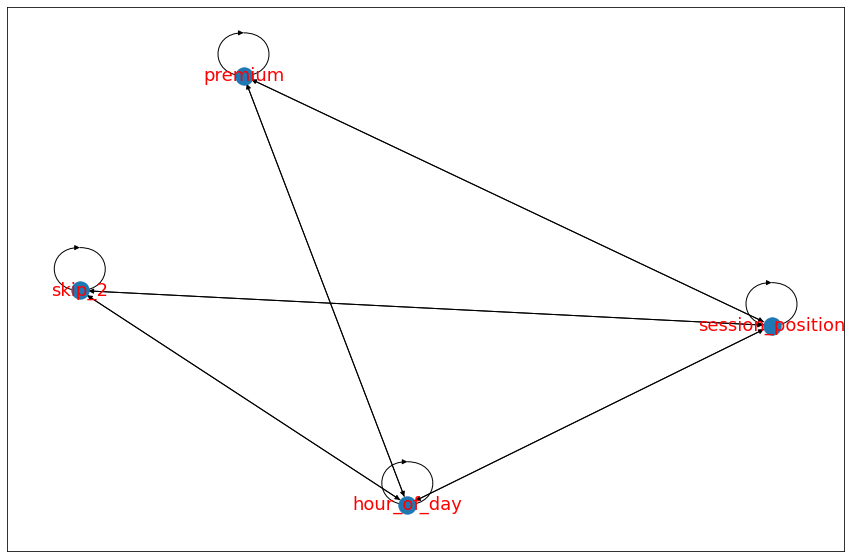

In [57]:
# apply graph lasso to data
skeleton = glasso.predict(df2)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

PC is ran on the skeleton of the given graph.


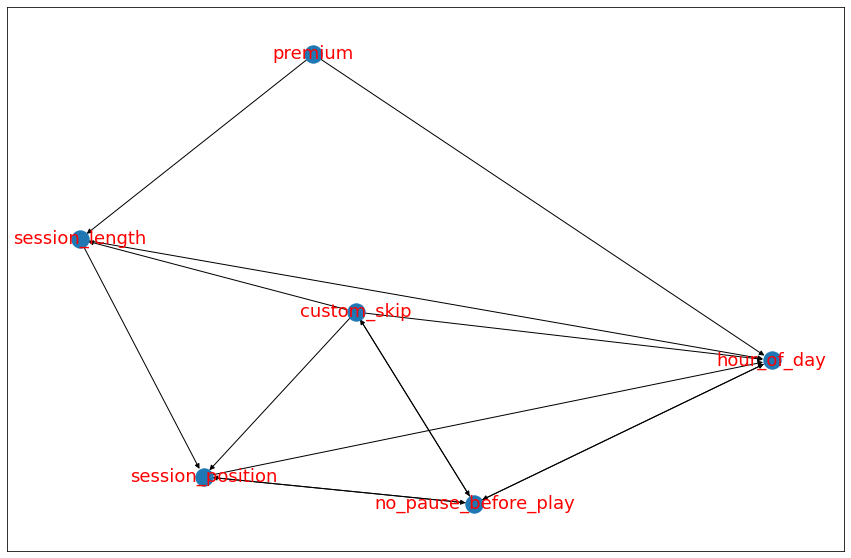

In [88]:
# Use causal discovery to get causal models# PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df1, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

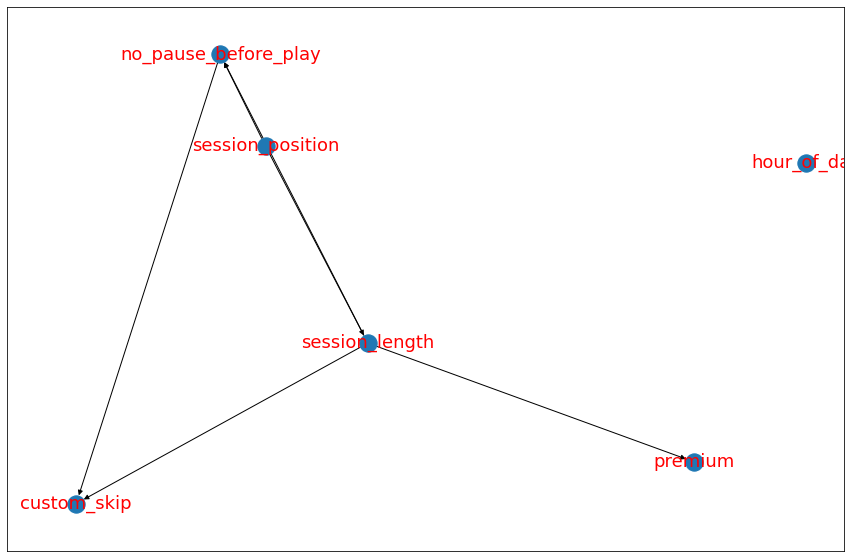

In [89]:
# Use causal discovery to get causal models# PC algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_pc = model_lingam.predict(df1)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

In [12]:
df.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'is_skip', 'skip'],
      dtype='object')

In [26]:
df.skip_1 = df.skip_1.astype(int)

In [25]:
df.premium = df.premium.astype(int)

In [34]:
from cdt.causality.graph import LiNGAM
obj = LiNGAM()
x = obj.predict(df)

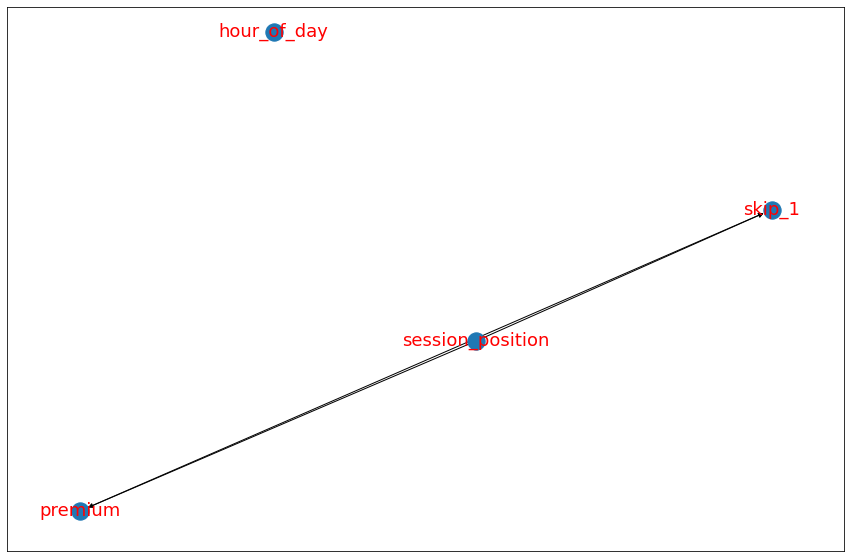

In [44]:
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(x, font_size=18, font_color='r')